## Project Stage - III (Distributions and Hypothesis Testing)

## Goals

The goal of Stage III is to develop advanced data for modeling for comparative analysis and hypothesis testing. 


### Tasks:

#### Task 1: Distribution Analysis (50 pts)     
- Member: (50 pts)
    - **M1.1** Compare NC and KY on Opioid Mortality - 2019 Data (20 pts)
         - Create histograms for NC and KY for Opioid Mortality (Normalized Mortality Rate)
         - Merge them into a single graph
         - Plot mean lines for both the histograms
         - Example below
         <img src="../../../../img/example_hist.png" width=600 height=600 />
         
    - **M1.2** Evaluate a distribution for the Normalized Mortality Rate (20 pts)
        - Choose a distribution for Normalized Mortality Rate
            - Provide explanation of your choice
        - Develop distribution estimator with - Method of Moments (MoM), Maximum Likelihood (MLE), and Kernel Density Estimation (KDE)
        - Plot the distribution estimations over the histograms
            - Each should be color coded on the graph and described for their parameters
            - Discuss which estimator works the best and why
        - Example below
         <img src="../../../../img/example_est.png" width=600 height=600 />
    - **M1.3** Select the top two states identified in Stage I and recreate the M1.2 task (10 pts)
         - Discuss the results

#### Task 2: Hypothesis Testing and Regression (50 pts)     
- Member: (50 pts)
    - **M2.1** Formulate Hypothesis for 5 identified variables in Stage 1 and test the hypothesis (25 pts)
        - For example, if your variable was `Premature death raw value`, divide the observations into two categories, high and low
            - Compare the distributions for a hypothesis test.
        - Formally state the Null and Alternative Hypothesis
        - Define the type of hypothesis and the thresholds
        - Conduct the test and discuss the results for all 5 variables
    - **M2.2** Perform linear regression to discover patterns (25 pts)
         - Perform a linear regression between Normalized Mortality and `Opiod_Dispensing_Rate`
             - Normalize the `Opiod_Dispensing_Rate` to the population
         - Perform multiple linear regression model with your 5 variables and `Opiod_Dispensing_Rate`
             - Evaluate the results and describe them.
         - Test non-linear model with the 5 + 1 variables (n=2,3,4)
             - Evaluate the results and describe them.
        
**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Github Repository. 
- Discuss the results as a team. Put together a presentation of your findings, record it via zoom, and upload the recording to canvas.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage V. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*

### M1.1 Compare NC and KY on Opioid Mortality - 2019 Data (20 pts)

Create histograms for NC and KY for Opioid Mortality (Normalized Mortality Rate)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import norm
import scipy.stats as stats
import plotly.express as px
from IPython.display import Image 

In [2]:
superdataset = pd.read_csv('../../../../data/stage_1/superdataset_merge.csv')

#### Create dataframe for NC for Opioid Mortality (Normalized Mortality Rate) 2019 Data

In [3]:
nc_df = superdataset.loc[(superdataset['State Abbreviation']=='NC')]
nc_df.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
20,"Alamance County, NC",37001,3109711,411,13.0,37,1,37001,NC,Alamance County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37001,34.2
29,"Alexander County, NC",37003,760950,121,16.0,37,3,37003,NC,Alexander County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37003,6.0
36,"Alleghany County, NC",37005,229301,25,11.0,37,5,37005,NC,Alleghany County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37005,39.9
60,"Anson County, NC",37007,544931,43,8.0,37,7,37007,NC,Anson County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37007,8.4
75,"Ashe County, NC",37009,552807,83,15.0,37,9,37009,NC,Ashe County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37009,46.2


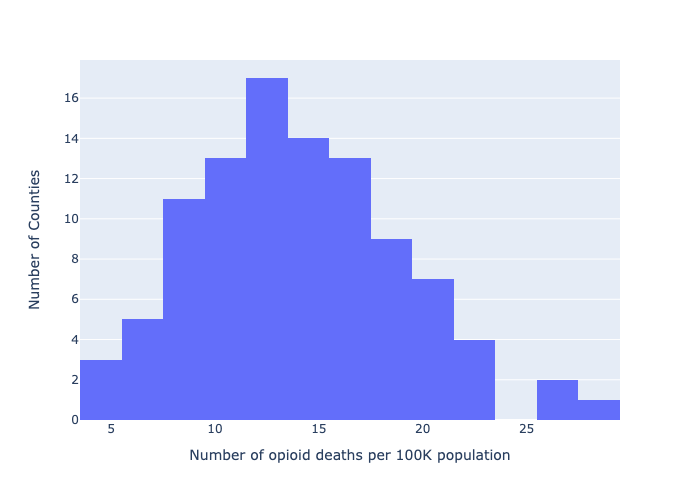

In [4]:
fig = px.histogram(nc_df, x="Norm_Deaths").update_layout(yaxis_title="Number of Counties",
                                                         xaxis_title="Number of opioid deaths per 100K population")
fig.write_image("images/nc_histogram.png")
img = Image(filename='images/nc_histogram.png')
display(img)

In [5]:
ky_df = superdataset.loc[(superdataset['State Abbreviation']=='KY')]
ky_df.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3
41,"Allen County, KY",21003,411770,54,13.0,21,3,21003,KY,Allen County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21003,44.5
50,"Anderson County, KY",21005,440394,77,17.0,21,5,21005,KY,Anderson County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21005,23.3
101,"Ballard County, KY",21007,172107,17,10.0,21,7,21007,KY,Ballard County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21007,4.5
114,"Barren County, KY",21009,871323,81,9.0,21,9,21009,KY,Barren County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21009,67.9


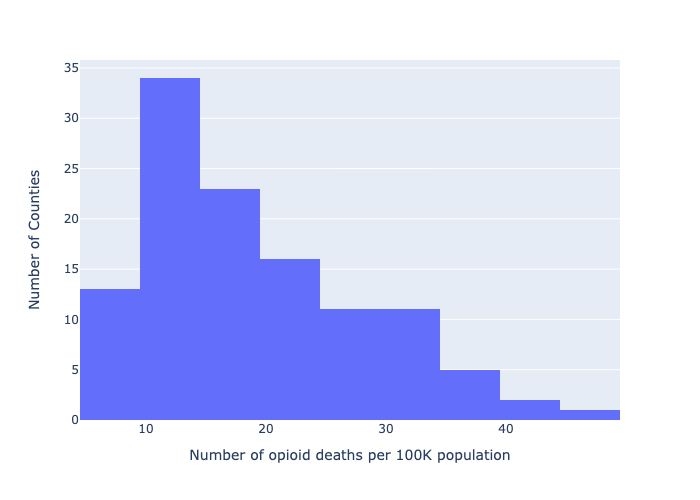

In [6]:
fig = px.histogram(ky_df, x="Norm_Deaths").update_layout(yaxis_title="Number of Counties",
                                                         xaxis_title="Number of opioid deaths per 100K population")
fig.write_image("images/ky_histogram.png")
img = Image(filename='images/ky_histogram.png')
display(img)

#### Create histograms for NC and KY for Opioid Mortality (Normalized Mortality Rate)

In [7]:
df_nc_ky = superdataset.loc[(superdataset['State Abbreviation']=='KY') | (superdataset['State Abbreviation']=='NC')]
df_nc_ky.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3
20,"Alamance County, NC",37001,3109711,411,13.0,37,1,37001,NC,Alamance County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37001,34.2
29,"Alexander County, NC",37003,760950,121,16.0,37,3,37003,NC,Alexander County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37003,6.0
36,"Alleghany County, NC",37005,229301,25,11.0,37,5,37005,NC,Alleghany County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,37005,39.9
41,"Allen County, KY",21003,411770,54,13.0,21,3,21003,KY,Allen County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21003,44.5


In [8]:
mean_nc =nc_df["Norm_Deaths"].mean(axis = 0, skipna = True)
(mean_nc)

13.97979797979798

In [9]:
mean_ky =ky_df["Norm_Deaths"].mean(axis = 0, skipna = True)
(mean_ky)

19.04310344827586

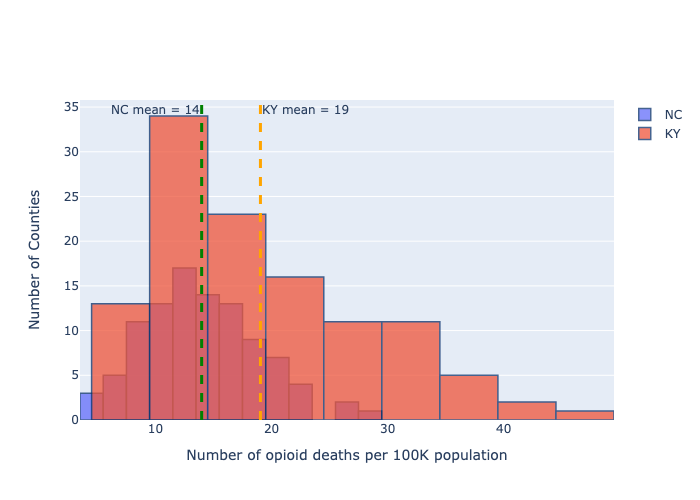

In [10]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(x = nc_df["Norm_Deaths"],name="NC"))
fig.add_trace(go.Histogram(x= ky_df["Norm_Deaths"],name="KY"))
fig.add_vline(x=mean_nc, line_width=3, line_dash="dash", line_color="green",
              annotation_text= ("NC mean = " + str(round(mean_nc))), annotation_position="top left")
fig.add_vline(x=mean_ky, line_width=3, line_dash="dash", line_color="orange",
             annotation_text= ("KY mean = " + str(round(mean_ky))), annotation_position="top right")
fig.update_layout(yaxis_title="Number of Counties",xaxis_title="Number of opioid deaths per 100K population")
# Overlay both histograms
fig.update_layout(barmode='overlay')
fig.update_traces( marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.write_image("images/mortality_rate_histogram.png")
img = Image(filename='images/mortality_rate_histogram.png')
display(img)

#### M1.2 Evaluate a distribution for the Normalized Mortality Rate (20 pts)

#### Choose a distribution for Normalized Mortality Rate

#### Develop distribution estimator with - Method of Moments (MoM), Maximum Likelihood (MLE), and Kernel Density Estimation (KDE)


#### Method of Moments (MoM)

In [11]:
# Calculating mean and standard dveiation
norm_mom_mean_nc = nc_df["Norm_Deaths"].mean()
norm_mom_std_nc = nc_df["Norm_Deaths"].std()
norm_mom_mean_ky = ky_df["Norm_Deaths"].mean()
norm_mom_std_ky = ky_df["Norm_Deaths"].std()


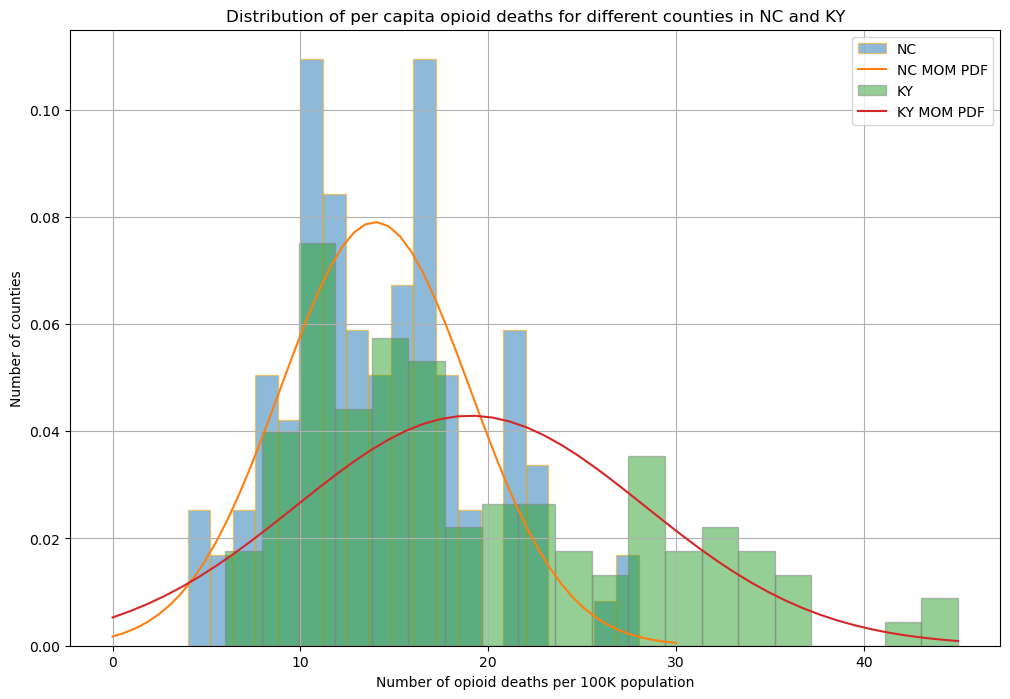

In [12]:
# Calculating method of moments using the norm.pdf function due to normal distribution.

plt.figure(figsize=(12,8))
# Calculating mean
mu_nc = norm_mom_mean_nc
mu_ky = norm_mom_mean_ky
# Calculating standard deviation
sigma_nc = norm_mom_std_nc
sigma_ky = norm_mom_std_ky
# Plotting first histogram 
nc_df["Norm_Deaths"].hist(density=True, bins=20, ec='orange', figsize=(12,8),alpha=0.5,label='NC')
# Using linespace to give the values of rating
plt.plot(np.linspace(0, 30), norm.pdf(np.linspace(0, 30), mu_nc,sigma_nc),label='NC MOM PDF')
# Plotting second histogram 
ky_df["Norm_Deaths"].hist(density=True, bins=20, ec='gray', figsize=(12,8),alpha=0.5,label='KY')
# Using linespace to give the values of rating
plt.plot(np.linspace(0, 45), norm.pdf(np.linspace(0, 45), mu_ky,sigma_ky),label='KY MOM PDF')
plt.legend(loc='upper right')
plt.xlabel("Number of opioid deaths per 100K population")
plt.ylabel("Number of counties")
plt.title('Distribution of per capita opioid deaths for different counties in NC and KY')
plt.show()

### Maximum Likelihood (MLE)

#### We can refer from the document the mean and standard deviation is same in normal distribution. If we see mean and sigma we will get the similar results of mom


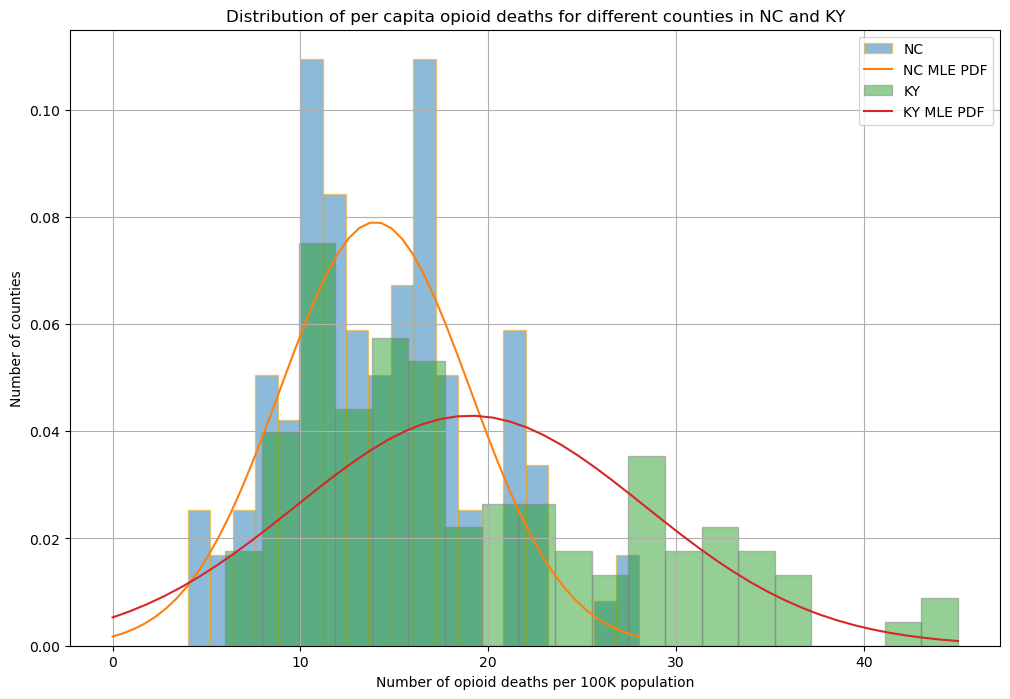

In [13]:
# Calculating Maximum Likelihood using the norm.pdf function due to normal distribution.

plt.figure(figsize=(12,8))
# Calculating mean
mu_nc = norm_mom_mean_nc
mu_ky = norm_mom_mean_ky
# Calculating standard deviation
sigma_nc = norm_mom_std_nc
sigma_ky = norm_mom_std_ky
# Plotting first histogram 
nc_df["Norm_Deaths"].hist(density=True, bins=20, ec='orange', figsize=(12,8),alpha=0.5,label='NC')
# Using linespace to give the values of rating
plt.plot(np.linspace(0, nc_df["Norm_Deaths"].max()), norm.pdf(np.linspace(0, nc_df["Norm_Deaths"].max()), mu_nc,sigma_nc),label='NC MLE PDF')
# Plotting second histogram 
ky_df["Norm_Deaths"].hist(density=True, bins=20, ec='gray', figsize=(12,8),alpha=0.5,label='KY')
# Using linespace to give the values of rating
plt.plot(np.linspace(0, ky_df["Norm_Deaths"].max()), norm.pdf(np.linspace(0, ky_df["Norm_Deaths"].max()), mu_ky,sigma_ky),label='KY MLE PDF')
plt.legend(loc='upper right')
plt.xlabel("Number of opioid deaths per 100K population")
plt.ylabel("Number of counties")
plt.title('Distribution of per capita opioid deaths for different counties in NC and KY')
plt.show()

### Kernel Density Estimation (KDE)

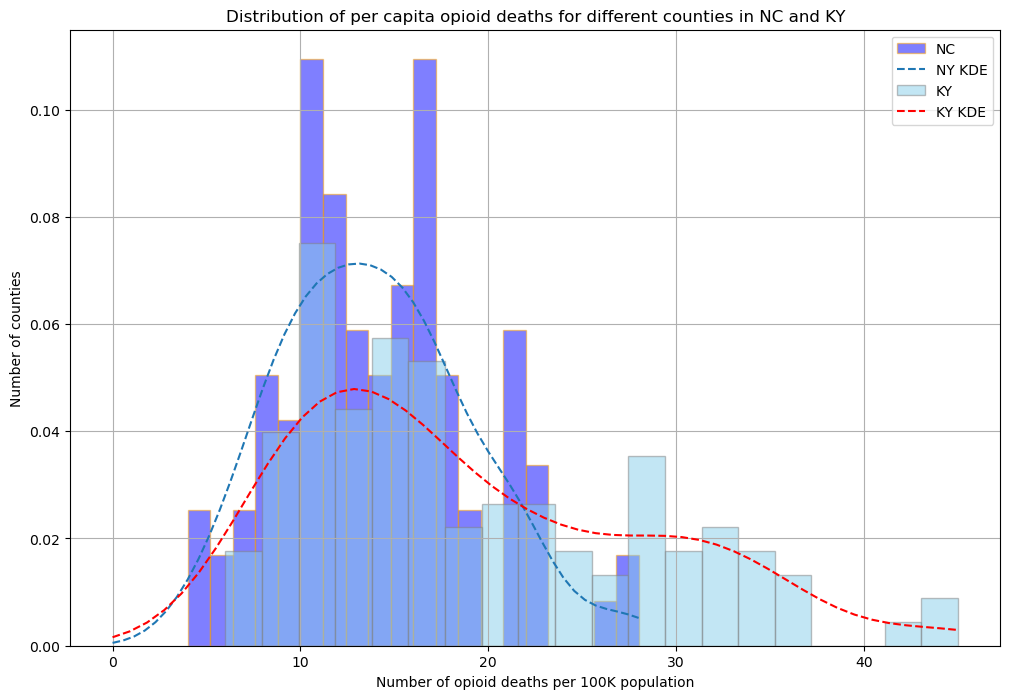

In [14]:
plt.figure(figsize=(12,8))
nc_df["Norm_Deaths"].hist(density=True, bins=20, ec='orange', figsize=(12,8),color = "blue",alpha=0.5,label='NC')
nc_x = np.linspace(0, nc_df["Norm_Deaths"].max())
density = kde.gaussian_kde(nc_df["Norm_Deaths"], bw_method=None)
plt.plot(nc_x, density(nc_x), '--',label='NY KDE')

ky_df["Norm_Deaths"].hist(density=True, bins=20, ec='gray', figsize=(12,8),color = "skyblue",alpha=0.5,label='KY')
ky_x = np.linspace(0, ky_df["Norm_Deaths"].max())
density = kde.gaussian_kde(ky_df["Norm_Deaths"], bw_method=None)
plt.plot(ky_x, density(ky_x), '--',label='KY KDE',color = "red")
plt.legend(loc='upper right')
plt.xlabel("Number of opioid deaths per 100K population")
plt.ylabel("Number of counties")
plt.title('Distribution of per capita opioid deaths for different counties in NC and KY')
plt.show()

### Discuss which estimator works the best and why

* KDE estimators provide better distribution of data than MOM and MLE estimators
* The graph lines provide better information about the increase and decrease denth rate.

### Select the top two states identified in Stage I and recreate the M1.2 task (10 pts)

#### Kentucky(KY) and West Virginia (WV) were identified top two states in Stage I

#### Create dataframe for West Virginia for Opioid Mortality (Normalized Mortality Rate) 2019 Data

In [15]:
wv_df = superdataset.loc[(superdataset['State Abbreviation']=='WV')]
wv_df.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
111,"Barbour County, WV",54001,339992,34,10.0,54,1,54001,WV,Barbour County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,54001,25.0
165,"Berkeley County, WV",54003,2087239,676,33.0,54,3,54003,WV,Berkeley County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,54003,35.2
204,"Boone County, WV",54005,511573,242,47.0,54,5,54005,WV,Boone County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,54005,81.5
223,"Braxton County, WV",54007,304481,41,13.0,54,7,54007,WV,Braxton County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,54007,25.7
235,"Brooke County, WV",54009,505180,117,23.0,54,9,54009,WV,Brooke County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,54009,17.0


In [16]:
# Calculating mean and standard dveiation
norm_mom_mean_wv = wv_df["Norm_Deaths"].mean()
norm_mom_std_wv = wv_df["Norm_Deaths"].std()
norm_mom_mean_ky = ky_df["Norm_Deaths"].mean()
norm_mom_std_ky = ky_df["Norm_Deaths"].std()


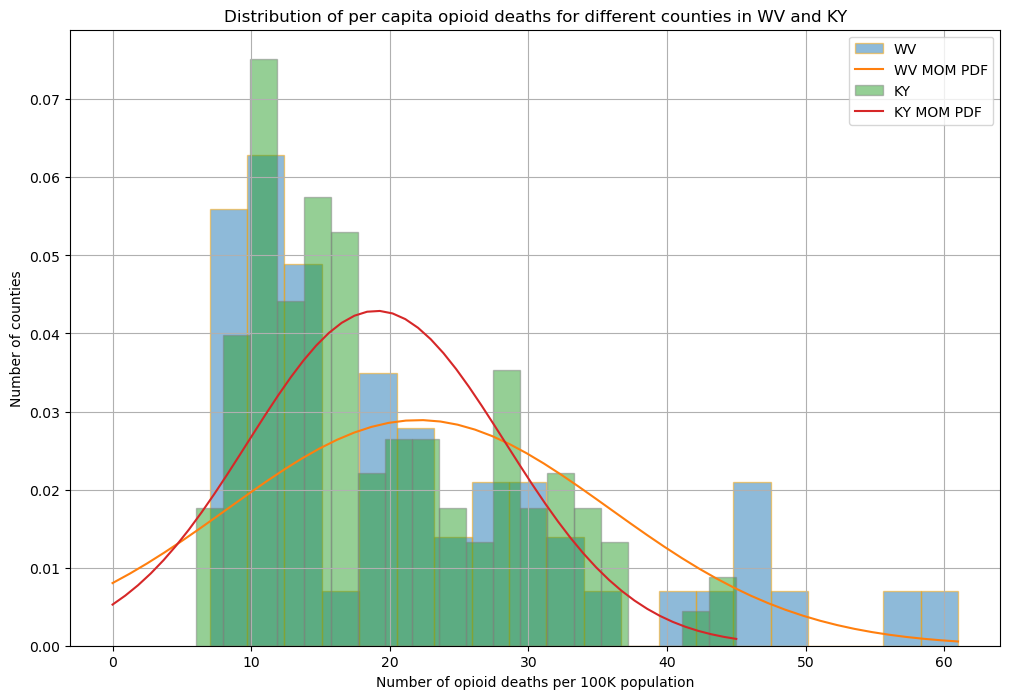

In [17]:
# Calculating method of moments using the norm.pdf function due to normal distribution.

plt.figure(figsize=(12,8))
# Calculating mean
mu_wv = norm_mom_mean_wv
mu_ky = norm_mom_mean_ky
# Calculating standard deviation
sigma_wv = norm_mom_std_wv
sigma_ky = norm_mom_std_ky
# Plotting first histogram 
wv_df["Norm_Deaths"].hist(density=True, bins=20, ec='orange', figsize=(12,8),alpha=0.5,label='WV')
# Using linespace to give the values of rating
plt.plot(np.linspace(0, wv_df["Norm_Deaths"].max()), norm.pdf(np.linspace(0, wv_df["Norm_Deaths"].max()), mu_wv,sigma_wv),label='WV MOM PDF')
# Plotting second histogram 
ky_df["Norm_Deaths"].hist(density=True, bins=20, ec='gray', figsize=(12,8),alpha=0.5,label='KY')
# Using linespace to give the values of rating
plt.plot(np.linspace(0, ky_df["Norm_Deaths"].max()), norm.pdf(np.linspace(0, ky_df["Norm_Deaths"].max()), mu_ky,sigma_ky),label='KY MOM PDF')
plt.legend(loc='upper right')
plt.xlabel("Number of opioid deaths per 100K population")
plt.ylabel("Number of counties")
plt.title('Distribution of per capita opioid deaths for different counties in WV and KY')
plt.show()

### Kernel Density Estimation (KDE)

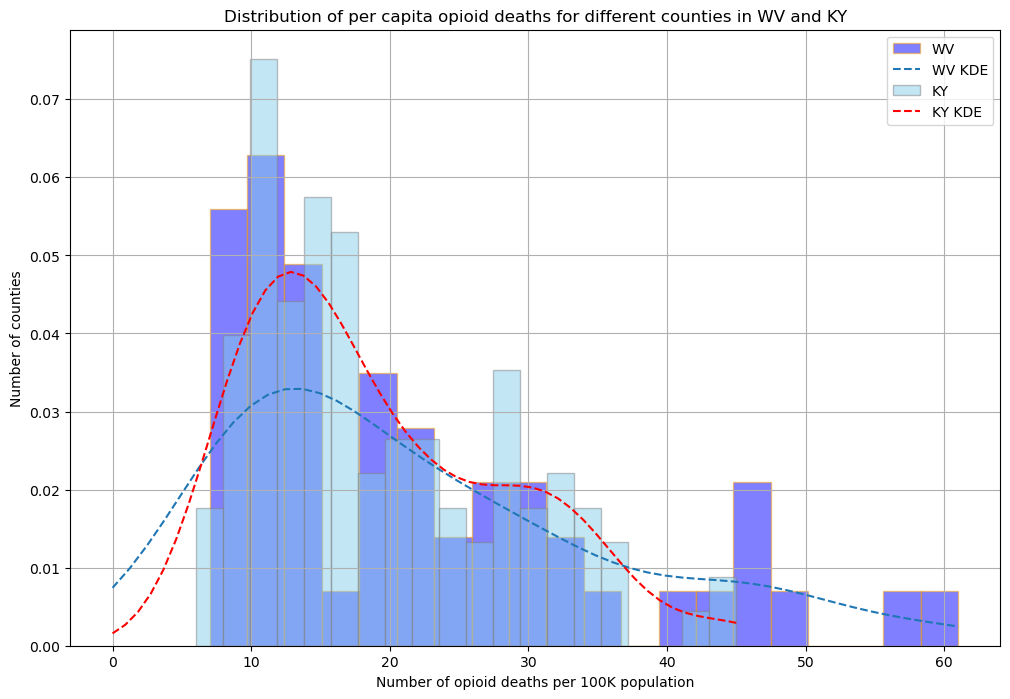

In [18]:
plt.figure(figsize=(12,8))
wv_df["Norm_Deaths"].hist(density=True, bins=20, ec='orange', figsize=(12,8),color = "blue",alpha=0.5,label='WV')
wv_x = np.linspace(0, wv_df["Norm_Deaths"].max())
density = kde.gaussian_kde(wv_df["Norm_Deaths"], bw_method=None)
plt.plot(wv_x, density(wv_x), '--',label='WV KDE')

ky_df["Norm_Deaths"].hist(density=True, bins=20, ec='gray', figsize=(12,8),color = "skyblue",alpha=0.5,label='KY')
ky_x = np.linspace(0, ky_df["Norm_Deaths"].max())
density = kde.gaussian_kde(ky_df["Norm_Deaths"], bw_method=None)
plt.plot(ky_x, density(ky_x), '--',label='KY KDE',color = "red")
plt.legend(loc='upper right')
plt.xlabel("Number of opioid deaths per 100K population")
plt.ylabel("Number of counties")
plt.title('Distribution of per capita opioid deaths for different counties in WV and KY')
plt.show()

### Discuss the results
    

* MOM, MLE and KDE estimatos show similar trends for Kentucky(KY) and West Virginia (WV) states. 
* West Virginia (WV) has higher death rates compared to NC state analysed earlier. 

### Task 2: Hypothesis Testing and Regression 

#### M2.2.1 Formulate Hypothesis for 5 identified variables in Stage 1 and test the hypothesis

### Variables identified in Stage I:

* Income inequality raw value
* Adult smoking raw value
* Premature death raw value 
* Violent crime raw value
* Adult smoking raw value

In [19]:
superdataset.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,45001,32.4
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,22001,32.2
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,51001,19.4
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID,16001,60.8
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3


#### Normalize the variables for 100K population. 

In [20]:
normalized_dataset = superdataset;

In [21]:
normalized_dataset['Normalized_Adult_smoking_Raw_Value'] = (normalized_dataset["Adult smoking raw value"]/normalized_dataset["Population"])*100000
normalized_dataset["Normalized_Income_Raw_Value"] = (normalized_dataset["Income inequality raw value"]/normalized_dataset["Population"])*100000
normalized_dataset["Normalized_Premature_Raw_Value"] = (normalized_dataset["Premature death raw value"]/normalized_dataset["Population"])*100000
normalized_dataset["Normalized_Violent_Crime_Raw_Value"] = (normalized_dataset["Violent crime raw value"]/normalized_dataset["Population"])*100000
normalized_dataset["Normalized_Unemployment_Raw_Value"] = (normalized_dataset["Unemployment raw value"]/normalized_dataset["Population"])*100000



In [22]:
# Filter NaN values 
normalized_dataset = normalized_dataset[normalized_dataset["Normalized_Violent_Crime_Raw_Value"].notnull()] 

In [23]:
normalized_dataset.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate,Normalized_Adult_smoking_Raw_Value,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value,Normalized_Unemployment_Raw_Value
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,SC,45001,32.4,0.032562,0.888521,1777.753848,63.728072,0.008560
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,LA,22001,32.2,0.016447,0.420134,796.601359,34.648551,0.004617
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,VA,51001,19.4,0.022706,0.623750,1440.364325,31.103196,0.006640
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,ID,16001,60.8,0.001457,0.055069,62.193617,2.853156,0.000344
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,KY,21001,71.3,0.059957,1.315467,2356.179143,10.208522,0.016322


#### Use mean() function on the categorigal variables to divide them into High and Low values

In [24]:
# Get the mean of the variables to create binary values 
mu_Normalized_Adult_smoking_Raw_Value = normalized_dataset["Normalized_Adult_smoking_Raw_Value"].mean()
print("Mean Normalized_Adult_smoking_Raw_Value : ", mu_Normalized_Adult_smoking_Raw_Value)

mu_Normalized_Income_Raw_Value = normalized_dataset["Normalized_Income_Raw_Value"].mean()
print("Mean Normalized_Income_Raw_Value : ", mu_Normalized_Income_Raw_Value)

mu_Normalized_Premature_Raw_Value = normalized_dataset["Normalized_Premature_Raw_Value"].mean()
print("Mean Normalized_Premature_Raw_Value : ", mu_Normalized_Premature_Raw_Value)

mu_Normalized_Violent_Crime_Raw_Value = normalized_dataset["Normalized_Violent_Crime_Raw_Value"].mean()
print("Mean Normalized_Violent_Crime_Raw_Value : ", mu_Normalized_Violent_Crime_Raw_Value)

mu_Unemployment_Raw_Value = normalized_dataset["Normalized_Unemployment_Raw_Value"].mean()
print("Mean Unemployment_Raw_Value : ", mu_Unemployment_Raw_Value)


Mean Normalized_Adult_smoking_Raw_Value :  0.03391338242776709
Mean Normalized_Income_Raw_Value :  0.8289895218422944
Mean Normalized_Premature_Raw_Value :  1672.7516884632382
Mean Normalized_Violent_Crime_Raw_Value :  42.92416288339295
Mean Unemployment_Raw_Value :  0.008953013558448188


In [25]:
# Get the mean of the Normalized Deaths to make Hypothesis Test comparison with selected Variables
mu_Normalized_Deaths = normalized_dataset["Norm_Deaths"].mean()
print("Mean Normalized_Deaths : ", mu_Normalized_Deaths)

Mean Normalized_Deaths :  12.254047322540472


In [26]:
# writing condition rating greater than equal mean as High and less than mean as Low
values = ['High', 'Low']

# Variable 1 - Normalized_Adult_smoking_Raw_Value
conditions = [
    normalized_dataset["Normalized_Adult_smoking_Raw_Value"] >= mu_Normalized_Adult_smoking_Raw_Value,
    normalized_dataset["Normalized_Adult_smoking_Raw_Value"] < mu_Normalized_Adult_smoking_Raw_Value,
]
normalized_dataset['Binary_adult_smoking'] = np.select(conditions, values)

#Variable 2 - Normalized_Income_Raw_Value 
conditions = [
    normalized_dataset["Normalized_Income_Raw_Value"] >= mu_Normalized_Income_Raw_Value,
    normalized_dataset["Normalized_Income_Raw_Value"] < mu_Normalized_Income_Raw_Value,
]
normalized_dataset['Binary_Income_Value'] = np.select(conditions, values)

#Variable 3 - Normalized_Premature_Raw_Value 
conditions = [
    normalized_dataset["Normalized_Premature_Raw_Value"] >= mu_Normalized_Premature_Raw_Value,
    normalized_dataset["Normalized_Premature_Raw_Value"] < mu_Normalized_Premature_Raw_Value,
]
normalized_dataset['Binary_Premature_Deaths'] = np.select(conditions, values)

#Variable 4 - Normalized_Violent_Crime_Raw_Value 
conditions = [
    normalized_dataset["Normalized_Violent_Crime_Raw_Value"] >= mu_Normalized_Violent_Crime_Raw_Value,
    normalized_dataset["Normalized_Violent_Crime_Raw_Value"] < mu_Normalized_Violent_Crime_Raw_Value,
]
normalized_dataset['Binary_Violent_Crime_Value'] = np.select(conditions, values)

#Variable 5 - Unemployment_Premature_Raw_Value 
conditions = [
    normalized_dataset["Unemployment raw value"] >= mu_Unemployment_Raw_Value,
    normalized_dataset["Unemployment raw value"] < mu_Unemployment_Raw_Value,
]
normalized_dataset['Binary_Unemployment_Value'] = np.select(conditions, values)




/var/folders/gn/n1w1tw9s7zv9v6tfmkp10ylm0000gn/T/ipykernel_20911/2204125528.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gn/n1w1tw9s7zv9v6tfmkp10ylm0000gn/T/ipykernel_20911/2204125528.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gn/n1w1tw9s7zv9v6tfmkp10ylm0000gn/T/ipykernel_20911/2204125528.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [27]:
#Variable  - Normalized Deaths for comparison for Hypothesis Testing 
conditions = [
    normalized_dataset["Norm_Deaths"] >= mu_Normalized_Deaths,
    normalized_dataset["Norm_Deaths"] < mu_Normalized_Deaths,
]
normalized_dataset['Binary_Norm_Deaths'] = np.select(conditions, values)


/var/folders/gn/n1w1tw9s7zv9v6tfmkp10ylm0000gn/T/ipykernel_20911/3923925035.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
normalized_dataset.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value,Normalized_Unemployment_Raw_Value,Binary_adult_smoking,Binary_Income_Value,Binary_Premature_Deaths,Binary_Violent_Crime_Value,Binary_Unemployment_Value,Binary_Norm_Deaths
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,0.888521,1777.753848,63.728072,0.008560,Low,High,High,High,High,Low
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,0.420134,796.601359,34.648551,0.004617,Low,Low,Low,Low,High,High
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,0.623750,1440.364325,31.103196,0.006640,Low,Low,Low,Low,High,Low
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,0.055069,62.193617,2.853156,0.000344,Low,Low,Low,Low,High,Low
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,1.315467,2356.179143,10.208522,0.016322,High,High,High,Low,High,Low


In [29]:
normalized_dataset

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value,Normalized_Unemployment_Raw_Value,Binary_adult_smoking,Binary_Income_Value,Binary_Premature_Deaths,Binary_Violent_Crime_Value,Binary_Unemployment_Value,Binary_Norm_Deaths
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,0.888521,1777.753848,63.728072,0.008560,Low,High,High,High,High,Low
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,0.420134,796.601359,34.648551,0.004617,Low,Low,Low,Low,High,High
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,0.623750,1440.364325,31.103196,0.006640,Low,Low,Low,Low,High,Low
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,0.055069,62.193617,2.853156,0.000344,Low,Low,Low,Low,High,Low
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,1.315467,2356.179143,10.208522,0.016322,High,High,High,Low,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,"Young County, TX",48503,380306,65,17.0,48,503,48503,TX,Young County,...,1.174082,2691.148772,44.554965,0.009956,High,High,High,High,High,High
2522,"Yuba County, CA",6115,1468094,153,11.0,6,115,6115,CA,Yuba County,...,0.312218,645.064568,28.181241,0.005071,Low,Low,Low,Low,High,Low
2524,"Yuma County, AZ",4027,3964172,468,12.0,4,27,4027,AZ,Yuma County,...,0.109759,147.173540,8.335811,0.004301,Low,Low,Low,Low,High,Low
2525,"Zapata County, TX",48505,284033,16,6.0,48,505,48505,TX,Zapata County,...,2.261838,2383.796459,33.813574,0.025864,High,High,High,Low,High,Low


In [30]:
analysis_dataset = normalized_dataset[["Norm_Deaths","Normalized_Adult_smoking_Raw_Value",
                                       "Normalized_Income_Raw_Value",
                                       "Normalized_Premature_Raw_Value",
                                       "Normalized_Violent_Crime_Raw_Value",
                                       "Normalized_Unemployment_Raw_Value",
                                       "Binary_Norm_Deaths","Binary_adult_smoking", "Binary_Income_Value", 
                                       "Binary_Premature_Deaths", "Binary_Violent_Crime_Value", "Binary_Unemployment_Value"]]


In [31]:
analysis_dataset

,Norm_Deaths,Normalized_Adult_smoking_Raw_Value,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value,Normalized_Unemployment_Raw_Value,Binary_Norm_Deaths,Binary_adult_smoking,Binary_Income_Value,Binary_Premature_Deaths,Binary_Violent_Crime_Value,Binary_Unemployment_Value
0,7.0,0.032562,0.888521,1777.753848,63.728072,0.008560,Low,Low,High,High,High,High
1,19.0,0.016447,0.420134,796.601359,34.648551,0.004617,High,Low,Low,Low,Low,High
2,11.0,0.022706,0.623750,1440.364325,31.103196,0.006640,Low,Low,Low,Low,Low,High
3,12.0,0.001457,0.055069,62.193617,2.853156,0.000344,Low,Low,Low,Low,Low,High
4,11.0,0.059957,1.315467,2356.179143,10.208522,0.016322,Low,High,High,High,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...
2521,17.0,0.039906,1.174082,2691.148772,44.554965,0.009956,High,High,High,High,High,High
2522,11.0,0.010119,0.312218,645.064568,28.181241,0.005071,Low,Low,Low,Low,Low,High
2524,12.0,0.003758,0.109759,147.173540,8.335811,0.004301,Low,Low,Low,Low,Low,High
2525,6.0,0.063274,2.261838,2383.796459,33.813574,0.025864,Low,High,High,High,Low,High


#### Compare the distribution of the variables

In [34]:
#import plotly.express as px
#fig = px.histogram(analysis_dataset)
#fig.write_image("images/variables_distribution_histogram.png")
#img = Image(filename='images/variables_distribution_histogram.png')
#display(img)

#### Formally state the Null and Alternative Hypothesis

#### 1. Prove or disprove the following Null Hypothesis:

#### Variable 1 - Normalized_Adult_smoking_Raw_Value
 * Null Hypothesis H0: The mortality rate due to Opioid is dependent on adult smoking rate in US.
 * Alternate Hypothesis H1: The mortality rate due to Opioid is not dependent on adult smoking rate in US.

#### Variable 2 - Income inequality_Raw_Value
 * Null Hypothesis H0: The mortality rate due to Opioid is dependent on Income inequality in US.
 * Alternate Hypothesis H1: The mortality rate due to Opioid is not dependent on Income inequality in US.

#### Variable 3 - Premature death raw value 
 * Null Hypothesis H0: The mortality rate due to Opioid is dependent on premature death rate in US.
 * Alternate Hypothesis H1: The mortality rate due to Opioid is not dependent on premature death rate in US.

#### Variable 4 - Violent crime raw value
 * Null Hypothesis H0: The mortality rate due to Opioid is dependent on Violent crime rate value.
 * Alternate Hypothesis H1: The mortality rate due to Opioid is not dependent on Violent crime rate value.

#### Variable 5 - Unemployment raw value
 * Null Hypothesis H0: The mortality rate due to Opioid is dependent on Unemployment rate value.
 * Alternate Hypothesis H1: The mortality rate due to Opioid is not dependent Unemployment rate value.




#### Define the type of hypothesis and the thresholds

#### Two-sample t-test is used to investigate whether the means of two independent data samples are same  

#### Selecting the values corresponding to  High/Low for each of the 5 variables

In [35]:
df_Adult_Smoking_High = normalized_dataset[normalized_dataset['Binary_adult_smoking']=="High"]
df_Adult_Smoking_Low = normalized_dataset[normalized_dataset['Binary_adult_smoking']=="Low"]
df_Income_Raw_Value_High = normalized_dataset[normalized_dataset['Binary_Income_Value']=="High"]
df_Income_Raw_Value_Low = normalized_dataset[normalized_dataset['Binary_Income_Value']=="Low"]
df_Premature_Raw_Value_High = normalized_dataset[normalized_dataset['Binary_Premature_Deaths']=="High"]
df_Premature_Raw_Value_Low = normalized_dataset[normalized_dataset['Binary_Premature_Deaths']=="Low"]
df_Violent_Crime_High = normalized_dataset[normalized_dataset['Binary_Violent_Crime_Value']=="High"]
df_Violent_Crime_Low = normalized_dataset[normalized_dataset['Binary_Violent_Crime_Value']=="Low"]
df_Unemployment_High = normalized_dataset[normalized_dataset['Binary_Unemployment_Value']=="High"]
df_Unemployment_Low = normalized_dataset[normalized_dataset['Binary_Unemployment_Value']=="Low"]

#### Performing two-sample t-test for low and high dataframes to compare Norm_deaths with each of 5 variables

In [36]:
print("T-test reult for high mortality and high normalized smoking raw value ",
       stats.ttest_ind(a= df_Adult_Smoking_High['Norm_Deaths'],
                b= df_Adult_Smoking_High['Normalized_Adult_smoking_Raw_Value'],
                equal_var=False))   
print("T-test reult for Low mortality and Low normalized smoking raw value ",
       stats.ttest_ind(a= df_Adult_Smoking_Low['Norm_Deaths'],
                b= df_Adult_Smoking_Low['Normalized_Adult_smoking_Raw_Value'],
                equal_var=False))


print("T-test reult for high mortality and high normalized Income_Raw_Value ",
       stats.ttest_ind(a= df_Income_Raw_Value_High['Norm_Deaths'],
                b= df_Income_Raw_Value_High['Normalized_Income_Raw_Value'],
                equal_var=False))   
print("T-test reult for Low mortality and Low normalized Income_Raw_Value ",
       stats.ttest_ind(a= df_Income_Raw_Value_Low['Norm_Deaths'],
                b= df_Income_Raw_Value_Low['Normalized_Income_Raw_Value'],
                equal_var=False))


print("T-test reult for high mortality and high normalized premature death raw value ",
       stats.ttest_ind(a= df_Premature_Raw_Value_High['Norm_Deaths'],
                b= df_Premature_Raw_Value_High['Normalized_Premature_Raw_Value'],
                equal_var=False))   
print("T-test reult for Low mortality and Low normalized premature death raw value ",
       stats.ttest_ind(a= df_Premature_Raw_Value_Low['Norm_Deaths'],
                b= df_Premature_Raw_Value_Low['Normalized_Premature_Raw_Value'],
                equal_var=False))

print("T-test reult for high mortality and high normalized Violent Crime value ",
       stats.ttest_ind(a= df_Premature_Raw_Value_High['Norm_Deaths'],
                b= df_Premature_Raw_Value_High['Normalized_Violent_Crime_Raw_Value'],
                equal_var=False))   
print("T-test reult for Low mortality and Low normalized Violent Crime value ",
       stats.ttest_ind(a= df_Premature_Raw_Value_Low['Norm_Deaths'],
                b= df_Premature_Raw_Value_Low['Normalized_Violent_Crime_Raw_Value'],
                equal_var=False))

print("T-test reult for high mortality and high normalized Unemployment raw value ",
       stats.ttest_ind(a= df_Premature_Raw_Value_High['Norm_Deaths'],
                b= df_Premature_Raw_Value_High['Normalized_Unemployment_Raw_Value'],
                equal_var=False))   
print("T-test reult for Low mortality and Low normalized Unemployment death raw value ",
       stats.ttest_ind(a= df_Premature_Raw_Value_Low['Norm_Deaths'],
                b= df_Premature_Raw_Value_Low['Normalized_Unemployment_Raw_Value'],
                equal_var=False))

T-test reult for high mortality and high normalized smoking raw value  Ttest_indResult(statistic=46.12350707007368, pvalue=1.2688910272875827e-237)
T-test reult for Low mortality and Low normalized smoking raw value  Ttest_indResult(statistic=77.43659793224363, pvalue=0.0)
T-test reult for high mortality and high normalized Income_Raw_Value  Ttest_indResult(statistic=37.82566948668534, pvalue=3.6632452753243885e-190)
T-test reult for Low mortality and Low normalized Income_Raw_Value  Ttest_indResult(statistic=77.72816299316894, pvalue=0.0)
T-test reult for high mortality and high normalized premature death raw value  Ttest_indResult(statistic=-46.66610069466775, pvalue=2.079258577655974e-237)
T-test reult for Low mortality and Low normalized premature death raw value  Ttest_indResult(statistic=-52.335953490848134, pvalue=0.0)
T-test reult for high mortality and high normalized Violent Crime value  Ttest_indResult(statistic=-28.95873931151981, pvalue=7.759194689268211e-130)
T-test reult

#### We have seen the p-value is less than 0.05 threshold for all the variables so we have to reject the Null Hypothesis and Accpet the alternate Hypothesis.
#### The p-values for variables with high mean values and low mean values are very different and have consideribly small values. 

#### M2.2 Perform linear regression to discover patterns (25 pts)

#### Perform a linear regression between Normalized Mortality and Opiod_Dispensing_Rate

In [37]:
superdataset.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate,Normalized_Adult_smoking_Raw_Value,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value,Normalized_Unemployment_Raw_Value
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,SC,45001,32.4,0.032562,0.888521,1777.753848,63.728072,0.008560
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,LA,22001,32.2,0.016447,0.420134,796.601359,34.648551,0.004617
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,VA,51001,19.4,0.022706,0.623750,1440.364325,31.103196,0.006640
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,ID,16001,60.8,0.001457,0.055069,62.193617,2.853156,0.000344
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,KY,21001,71.3,0.059957,1.315467,2356.179143,10.208522,0.016322


#### Normalize the Opiod_Dispensing_Rate to the population.

In [38]:
testDataset = superdataset;
testDataset.head()

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate,Normalized_Adult_smoking_Raw_Value,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value,Normalized_Unemployment_Raw_Value
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,SC,45001,32.4,0.032562,0.888521,1777.753848,63.728072,0.008560
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,LA,22001,32.2,0.016447,0.420134,796.601359,34.648551,0.004617
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,VA,51001,19.4,0.022706,0.623750,1440.364325,31.103196,0.006640
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,ID,16001,60.8,0.001457,0.055069,62.193617,2.853156,0.000344
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,KY,21001,71.3,0.059957,1.315467,2356.179143,10.208522,0.016322


In [39]:
testDataset['Normalized_Dispensing_Rate'] = (testDataset['Opiod_Dispensing_Rate'] /testDataset["Population"]) * 100000

In [40]:
linear_df = testDataset[['Normalized_Dispensing_Rate','Norm_Deaths']]
linear_df.head()

,Normalized_Dispensing_Rate,Norm_Deaths
0,6.051675,7.0
1,2.516162,19.0
2,2.671481,11.0
3,0.752154,12.0
4,18.378657,11.0


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = linear_df['Norm_Deaths'].values.reshape(1, -1)
Y = linear_df['Normalized_Dispensing_Rate'].values.reshape(1, -1)

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y, y_pred, squared=False)
print("Root Mean Square value for Linear Regression", rms)

Root Mean Square value for Linear Regression 0.0


#### We perform linear regression between norm_deaths and normalised_dispensing_rate using sklearn library and we got the RMSE value as 0
#### This implies that our model prediction are correct and up to the mark

#### Perform multiple linear regression model with your 5 variables and Opiod_Dispensing_Rate

In [42]:
linear_df_variables = testDataset[['Normalized_Adult_smoking_Raw_Value','Normalized_Income_Raw_Value','Normalized_Premature_Raw_Value',
                                   'Normalized_Violent_Crime_Raw_Value','Normalized_Unemployment_Raw_Value','Normalized_Dispensing_Rate']]
linear_df_variables.head()

,Normalized_Adult_smoking_Raw_Value,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value,Normalized_Unemployment_Raw_Value,Normalized_Dispensing_Rate
0,0.032562,0.888521,1777.753848,63.728072,0.008560,6.051675
1,0.016447,0.420134,796.601359,34.648551,0.004617,2.516162
2,0.022706,0.623750,1440.364325,31.103196,0.006640,2.671481
3,0.001457,0.055069,62.193617,2.853156,0.000344,0.752154
4,0.059957,1.315467,2356.179143,10.208522,0.016322,18.378657


In [43]:
# Filter NaN values 
linear_df_variables = linear_df_variables[linear_df_variables['Normalized_Violent_Crime_Raw_Value'].notnull()]

In [44]:
X = linear_df_variables[['Normalized_Adult_smoking_Raw_Value','Normalized_Income_Raw_Value','Normalized_Premature_Raw_Value',
                                   'Normalized_Violent_Crime_Raw_Value','Normalized_Unemployment_Raw_Value', 'Normalized_Dispensing_Rate']]
X


,Normalized_Adult_smoking_Raw_Value,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value,Normalized_Unemployment_Raw_Value,Normalized_Dispensing_Rate
0,0.032562,0.888521,1777.753848,63.728072,0.008560,6.051675
1,0.016447,0.420134,796.601359,34.648551,0.004617,2.516162
2,0.022706,0.623750,1440.364325,31.103196,0.006640,2.671481
3,0.001457,0.055069,62.193617,2.853156,0.000344,0.752154
4,0.059957,1.315467,2356.179143,10.208522,0.016322,18.378657
...,...,...,...,...,...,...
2521,0.039906,1.174082,2691.148772,44.554965,0.009956,11.543336
2522,0.010119,0.312218,645.064568,28.181241,0.005071,2.186508
2524,0.003758,0.109759,147.173540,8.335811,0.004301,0.620558
2525,0.063274,2.261838,2383.796459,33.813574,0.025864,1.337873


In [45]:
import statsmodels.formula.api as smf

# create a fitted model with all three features
lm = smf.ols(formula='Normalized_Dispensing_Rate ~ Normalized_Adult_smoking_Raw_Value + Normalized_Income_Raw_Value + Normalized_Premature_Raw_Value + Normalized_Violent_Crime_Raw_Value + Normalized_Unemployment_Raw_Value', data=linear_df_variables).fit()

# print the coefficients
lm.params

Intercept                               0.181373
Normalized_Adult_smoking_Raw_Value   -204.143605
Normalized_Income_Raw_Value             8.805963
Normalized_Premature_Raw_Value          0.003804
Normalized_Violent_Crime_Raw_Value      0.015092
Normalized_Unemployment_Raw_Value     -47.975207
dtype: float64

#### Inferences:
* The slopes for Income Raw Value and Unemployment Raw values are negative which states that these variables are inversely proportional to normalized dispensing rates 
* The slopes for adult smoking raw value, violent crime value and premature death value are positive which states they are proprtional to normalized dispensing rate.

#### Test non-linear model with the 5 + 1 variables (n=2,3,4)


#### 2-nd order polynomial

In [46]:
poly_2 = smf.ols(formula='Normalized_Dispensing_Rate ~ 1 + Normalized_Adult_smoking_Raw_Value + I(Normalized_Adult_smoking_Raw_Value ** 2.0) + 1 + Normalized_Income_Raw_Value + I(Normalized_Income_Raw_Value ** 2.0)+ 1 + Normalized_Premature_Raw_Value + I(Normalized_Premature_Raw_Value ** 2.0)+ 1 + Normalized_Violent_Crime_Raw_Value + I(Normalized_Violent_Crime_Raw_Value ** 2.0) + 1 + Normalized_Unemployment_Raw_Value + I(Normalized_Unemployment_Raw_Value ** 2.0)', data=linear_df_variables).fit()
poly_2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Normalized_Dispensing_Rate   R-squared:                       0.267
Model:                                    OLS   Adj. R-squared:                  0.264
Method:                         Least Squares   F-statistic:                     87.20
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):          1.38e-153
Time:                                22:14:35   Log-Likelihood:                -9902.8
No. Observations:                        2409   AIC:                         1.983e+04
Df Residuals:                            2398   BIC:                         1.989e+04
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        2.2517      0.522      4.315      0.000       1.228       3.275
Normalized_Adult_smoking_Raw_Value              51.3432     67.465      0.761      0.447     -80.952     183.639
I(Normalized_Adult_smoking_Raw_Value ** 2.0)  -485.9478    237.243     -2.048      0.041    -951.171     -20.724
Normalized_Income_Raw_Value                     -4.1872      2.714     -1.543      0.123      -9.509       1.134
I(Normalized_Income_Raw_Value ** 2.0)            2.1153      0.365      5.802      0.000       1.400       2.830
Normalized_Premature_Raw_Value                  -0.0003      0.001     -0.263      0.793      -0.002       0.002
I(Normalized_Premature_Raw_Value ** 2.0)      2.124e-07   6.45e-08      3.293      0.001    8.59e-08    3.39e-07
Normalized_Violent_Crime_Raw_Value               0.0480      0.014      3.509      0.000       0.021       0.075
I(Normalized_Violent_Crime_Raw_Value ** 2.0) -6.634e-05   3.27e-05     -2.031      0.042      -0.000   -2.29e-06
Normalized_Unemployment_Raw_Value              336.3877    169.070      1.990      0.047       4.849     667.927
I(Normalized_Unemployment_Raw_Value ** 2.0)  -5007.6676   2110.738     -2.372      0.018   -9146.727    -868.608
==============================================================================
Omnibus:                     5903.369   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         96516249.700
Skew:                          24.989   Prob(JB):                         0.00
Kurtosis:                     982.316   Cond. No.                     1.56e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The R squared value is 0.267 for 2nd order polynomial regression represents that our model fits the data in a good way and better than linear regression
#### Normalized_Income_Raw_Value and Normalized_Violent_Crime_Raw_Value have significant p value. This implies that we can reject the null hypothesis for these  2 variables


#### 3-rd order polynomial

In [47]:

poly_3 = smf.ols(formula='Normalized_Dispensing_Rate ~ 1 + Normalized_Adult_smoking_Raw_Value + I(Normalized_Adult_smoking_Raw_Value ** 2.0) + I(Normalized_Adult_smoking_Raw_Value ** 3.0)+ 1 + Normalized_Income_Raw_Value + I(Normalized_Income_Raw_Value ** 2.0) + I(Normalized_Income_Raw_Value ** 3.0)+ 1 + Normalized_Premature_Raw_Value + I(Normalized_Premature_Raw_Value ** 2.0)+ + I(Normalized_Premature_Raw_Value ** 3.0) + 1 + Normalized_Violent_Crime_Raw_Value + I(Normalized_Violent_Crime_Raw_Value ** 2.0) + I(Normalized_Violent_Crime_Raw_Value ** 3.0) + 1 + Normalized_Unemployment_Raw_Value + I(Normalized_Unemployment_Raw_Value ** 2.0) + I(Normalized_Unemployment_Raw_Value ** 3.0)', data=linear_df_variables).fit()
poly_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Normalized_Dispensing_Rate   R-squared:                       0.273
Model:                                    OLS   Adj. R-squared:                  0.270
Method:                         Least Squares   F-statistic:                     75.13
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):          2.16e-156
Time:                                22:14:35   Log-Likelihood:                -9891.7
No. Observations:                        2409   AIC:                         1.981e+04
Df Residuals:                            2396   BIC:                         1.988e+04
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        1.8269      0.604      3.026      0.003       0.643       3.011
Normalized_Adult_smoking_Raw_Value             -39.9426     67.165     -0.595      0.552    -171.650      91.765
I(Normalized_Adult_smoking_Raw_Value ** 2.0)   -62.8242    214.903     -0.292      0.770    -484.240     358.592
I(Normalized_Adult_smoking_Raw_Value ** 3.0)   -28.5118    109.684     -0.260      0.795    -243.598     186.574
Normalized_Income_Raw_Value                      6.0431      3.862      1.565      0.118      -1.530      13.617
I(Normalized_Income_Raw_Value ** 2.0)           -1.4380      1.205     -1.193      0.233      -3.802       0.926
I(Normalized_Income_Raw_Value ** 3.0)            0.2859      0.102      2.815      0.005       0.087       0.485
Normalized_Premature_Raw_Value                   0.0017      0.002      1.000      0.317      -0.002       0.005
I(Normalized_Premature_Raw_Value ** 2.0)      1.098e-08   2.11e-07      0.052      0.958   -4.02e-07    4.24e-07
I(Normalized_Premature_Raw_Value ** 3.0)       5.56e-12   7.17e-12      0.776      0.438   -8.49e-12    1.96e-11
Normalized_Violent_Crime_Raw_Value              -0.0395      0.024     -1.643      0.100      -0.087       0.008
I(Normalized_Violent_Crime_Raw_Value ** 2.0)     0.0005      0.000      3.731      0.000       0.000       0.001
I(Normalized_Violent_Crime_Raw_Value ** 3.0)  -7.29e-07   1.69e-07     -4.317      0.000   -1.06e-06   -3.98e-07
Normalized_Unemployment_Raw_Value              -42.4552     75.341     -0.564      0.573    -190.195     105.285
I(Normalized_Unemployment_Raw_Value ** 2.0)     -2.8299      5.411     -0.523      0.601     -13.440       7.780
I(Normalized_Unemployment_Raw_Value ** 3.0)     -0.1587      0.412     -0.386      0.700      -0.966       0.648
==============================================================================
Omnibus:                     5831.256   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         90345001.249
Skew:                          24.231   Prob(JB):                         0.00
Kurtosis:                     950.484   Cond. No.                     8.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The R squared value is 0.273 for 3rd order polynomial regression. So It is better fitting for the model than 2_nd degree polynomial
#### Normalized_Violent_Crime_Raw_Value have values 0.000, so that we can reject the null hypothesis.

#### 4-th order polynomial

In [48]:

poly_4 = smf.ols(formula='Normalized_Dispensing_Rate ~ 1 + Normalized_Adult_smoking_Raw_Value + I(Normalized_Adult_smoking_Raw_Value ** 2.0) + I(Normalized_Adult_smoking_Raw_Value ** 3.0) + I(Normalized_Adult_smoking_Raw_Value ** 4.0)+ 1 + Normalized_Income_Raw_Value + I(Normalized_Income_Raw_Value ** 2.0) + I(Normalized_Income_Raw_Value ** 3.0) + I(Normalized_Income_Raw_Value ** 3.0)+ 1 + Normalized_Premature_Raw_Value + I(Normalized_Premature_Raw_Value ** 2.0)+ + I(Normalized_Premature_Raw_Value ** 3.0) +  I(Normalized_Premature_Raw_Value ** 4.0)+ 1 + Normalized_Violent_Crime_Raw_Value + I(Normalized_Violent_Crime_Raw_Value ** 2.0) + I(Normalized_Violent_Crime_Raw_Value ** 3.0) + I(Normalized_Violent_Crime_Raw_Value ** 4.0) + 1 + Normalized_Unemployment_Raw_Value + I(Normalized_Unemployment_Raw_Value ** 2.0) + I(Normalized_Unemployment_Raw_Value ** 3.0) + I(Normalized_Unemployment_Raw_Value ** 4.0)', data=linear_df_variables).fit()
poly_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Normalized_Dispensing_Rate   R-squared:                       0.294
Model:                                    OLS   Adj. R-squared:                  0.292
Method:                         Least Squares   F-statistic:                     166.4
Date:                        Tue, 22 Nov 2022   Prob (F-statistic):          2.84e-177
Time:                                22:14:35   Log-Likelihood:                -9857.7
No. Observations:                        2409   AIC:                         1.973e+04
Df Residuals:                            2402   BIC:                         1.977e+04
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.0007      0.001      1.195      0.232      -0.000       0.002
Normalized_Adult_smoking_Raw_Value              -0.0014      0.000     -6.772      0.000      -0.002      -0.001
I(Normalized_Adult_smoking_Raw_Value ** 2.0)  4.172e-06   1.64e-06      2.543      0.011    9.55e-07    7.39e-06
I(Normalized_Adult_smoking_Raw_Value ** 3.0)  8.428e-07   4.74e-07      1.779      0.075   -8.63e-08    1.77e-06
I(Normalized_Adult_smoking_Raw_Value ** 4.0)  9.087e-08   1.64e-07      0.553      0.580   -2.31e-07    4.13e-07
Normalized_Income_Raw_Value                      0.0018      0.000      7.899      0.000       0.001       0.002
I(Normalized_Income_Raw_Value ** 2.0)            0.0177      0.002      7.669      0.000       0.013       0.022
I(Normalized_Income_Raw_Value ** 3.0)            0.1582      0.020      7.831      0.000       0.119       0.198
Normalized_Premature_Raw_Value                   0.0062      0.001      6.417      0.000       0.004       0.008
I(Normalized_Premature_Raw_Value ** 2.0)     -1.521e-06    2.7e-07     -5.627      0.000   -2.05e-06   -9.91e-07
I(Normalized_Premature_Raw_Value ** 3.0)       1.54e-10   2.49e-11      6.188      0.000    1.05e-10    2.03e-10
I(Normalized_Premature_Raw_Value ** 4.0)     -4.146e-15   6.93e-16     -5.985      0.000    -5.5e-15   -2.79e-15
Normalized_Violent_Crime_Raw_Value               0.0529      0.035      1.528      0.127      -0.015       0.121
I(Normalized_Violent_Crime_Raw_Value ** 2.0)    -0.0007      0.000     -2.148      0.032      -0.001   -5.73e-05
I(Normalized_Violent_Crime_Raw_Value ** 3.0)  3.182e-06   8.94e-07      3.560      0.000    1.43e-06    4.93e-06
I(Normalized_Violent_Crime_Raw_Value ** 4.0)  -3.58e-09   7.82e-10     -4.579      0.000   -5.11e-09   -2.05e-09
Normalized_Unemployment_Raw_Value             9.386e-06   1.44e-06      6.514      0.000    6.56e-06    1.22e-05
I(Normalized_Unemployment_Raw_Value ** 2.0)   1.206e-06   1.54e-07      7.836      0.000    9.04e-07    1.51e-06
I(Normalized_Unemployment_Raw_Value ** 3.0)    1.29e-07   1.57e-08      8.214      0.000    9.82e-08     1.6e-07
I(Normalized_Unemployment_Raw_Value ** 4.0)   1.278e-08   1.55e-09      8.232      0.000    9.73e-09    1.58e-08
==============================================================================
Omnibus:                     5574.326   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         69308651.808
Skew:                          21.692   Prob(JB):                         0.00
Kurtosis:                     832.828   Cond. No.                     5.90e+22
=

#### The R squared value is 0.294 for 4th order polynomial regression. It is the best fit model. The pvalues are 0.000 for the following coloumns Normalized_Adult_smoking_Raw_Value,Normalized_Income_Raw_Value,Normalized_Premature_Raw_Value,Normalized_Violent_Crime_Raw_Value	,Normalized_Unemployment_Raw_Value. So that we can reject the null hypothesis.

In [49]:
##References:
#1. Two-sample t-test - github Class_Resources/Lecture_06/Statistics/05_Hypothesis.ipynb
#2. Linear Regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html